<a href="https://colab.research.google.com/github/mgersins-design/Machine-Learning/blob/main/HW5/Temperature_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import torch

In [16]:
t_c = [0.5,  14.0, 15.0, 28.0, 11.0,  8.0,  3.0, -4.0,  6.0, 13.0, 21.0]
t_u = [35.7, 55.9, 58.2, 81.9, 56.3, 48.9, 33.9, 21.8, 48.4, 60.4, 68.4]
t_c = torch.tensor(t_c)
t_u = torch.tensor(t_u)

t_un = 0.03 * t_u # normalization

In [17]:
def model(t_u, w1, w2, b):
    return w2 * t_u **2 + w1 * t_u + b

def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [18]:
import torch.optim as optim
dir(optim)

['ASGD',
 'Adadelta',
 'Adafactor',
 'Adagrad',
 'Adam',
 'AdamW',
 'Adamax',
 'LBFGS',
 'NAdam',
 'Optimizer',
 'RAdam',
 'RMSprop',
 'Rprop',
 'SGD',
 'SparseAdam',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_adafactor',
 '_functional',
 'lr_scheduler',
 'swa_utils']

In [19]:
params = torch.tensor([1.0, 0.0, 0.0], requires_grad=True)
learning_rate = 1e-5
optimizer = optim.SGD([params], lr=learning_rate)

In [20]:
t_p = model(t_u, *params)
loss = loss_fn(t_p, t_c)
loss.backward()

optimizer.step()

params

tensor([ 9.5483e-01, -2.6670e+00, -8.2600e-04], requires_grad=True)

In [21]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, loss.item()))

    return params

In [22]:
params = torch.tensor([1.0, 0.0, 0.0], requires_grad=True)
learning_rate = 1e-1
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params, # <1>
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss nan
Epoch 1000, Loss nan
Epoch 1500, Loss nan
Epoch 2000, Loss nan
Epoch 2500, Loss nan
Epoch 3000, Loss nan
Epoch 3500, Loss nan
Epoch 4000, Loss nan
Epoch 4500, Loss nan
Epoch 5000, Loss nan


tensor([nan, nan, nan], requires_grad=True)

In [23]:
params = torch.tensor([1.0, 0.0, 0.0], requires_grad=True)
learning_rate = 1e-2
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params, # <1>
    t_u = t_un,
    t_c = t_c)

# Saving best results
t_p_nonlinear = model(t_un, *params)

Epoch 500, Loss 2.709675
Epoch 1000, Loss 2.614327
Epoch 1500, Loss 2.561384
Epoch 2000, Loss 2.513876
Epoch 2500, Loss 2.471168
Epoch 3000, Loss 2.432769
Epoch 3500, Loss 2.398245
Epoch 4000, Loss 2.367206
Epoch 4500, Loss 2.339300
Epoch 5000, Loss 2.314209


In [24]:
params = torch.tensor([1.0, 0.0, 0.0], requires_grad=True)
learning_rate = 1e-3
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params, # <1>
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 9.841950
Epoch 1000, Loss 6.687181
Epoch 1500, Loss 4.926157
Epoch 2000, Loss 3.941876
Epoch 2500, Loss 3.390492
Epoch 3000, Loss 3.080378
Epoch 3500, Loss 2.904751
Epoch 4000, Loss 2.804098
Epoch 4500, Loss 2.745259
Epoch 5000, Loss 2.709748


tensor([ 0.2353,  5.5163, -4.3531], requires_grad=True)

In [25]:
params = torch.tensor([1.0, 0.0, 0.0], requires_grad=True)
learning_rate = 1e-4
optimizer = optim.SGD([params], lr=learning_rate)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params, # <1>
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 25.495850
Epoch 1000, Loss 14.934806
Epoch 1500, Loss 13.500635
Epoch 2000, Loss 12.829545
Epoch 2500, Loss 12.251003
Epoch 3000, Loss 11.709628
Epoch 3500, Loss 11.199304
Epoch 4000, Loss 10.717945
Epoch 4500, Loss 10.263882
Epoch 5000, Loss 9.835559


tensor([ 1.8009,  3.5356, -0.5033], requires_grad=True)

In [26]:
def model(t_u, w, b):
    return w * t_u + b

params_lin = torch.tensor([1.0, 0.0], requires_grad=True)

learning_rate_lin = 1e-2
optimizer_lin = optim.SGD([params_lin], lr=learning_rate_lin)

training_loop(
    n_epochs = 5000,
    optimizer = optimizer_lin,
    params = params_lin,
    t_u = t_un,
    t_c = t_c
)

t_p_linear = model(t_un, *params_lin)


Epoch 500, Loss 12.771814
Epoch 1000, Loss 5.623678
Epoch 1500, Loss 3.666010
Epoch 2000, Loss 3.129862
Epoch 2500, Loss 2.983025
Epoch 3000, Loss 2.942811
Epoch 3500, Loss 2.931799
Epoch 4000, Loss 2.928783
Epoch 4500, Loss 2.927957
Epoch 5000, Loss 2.927730


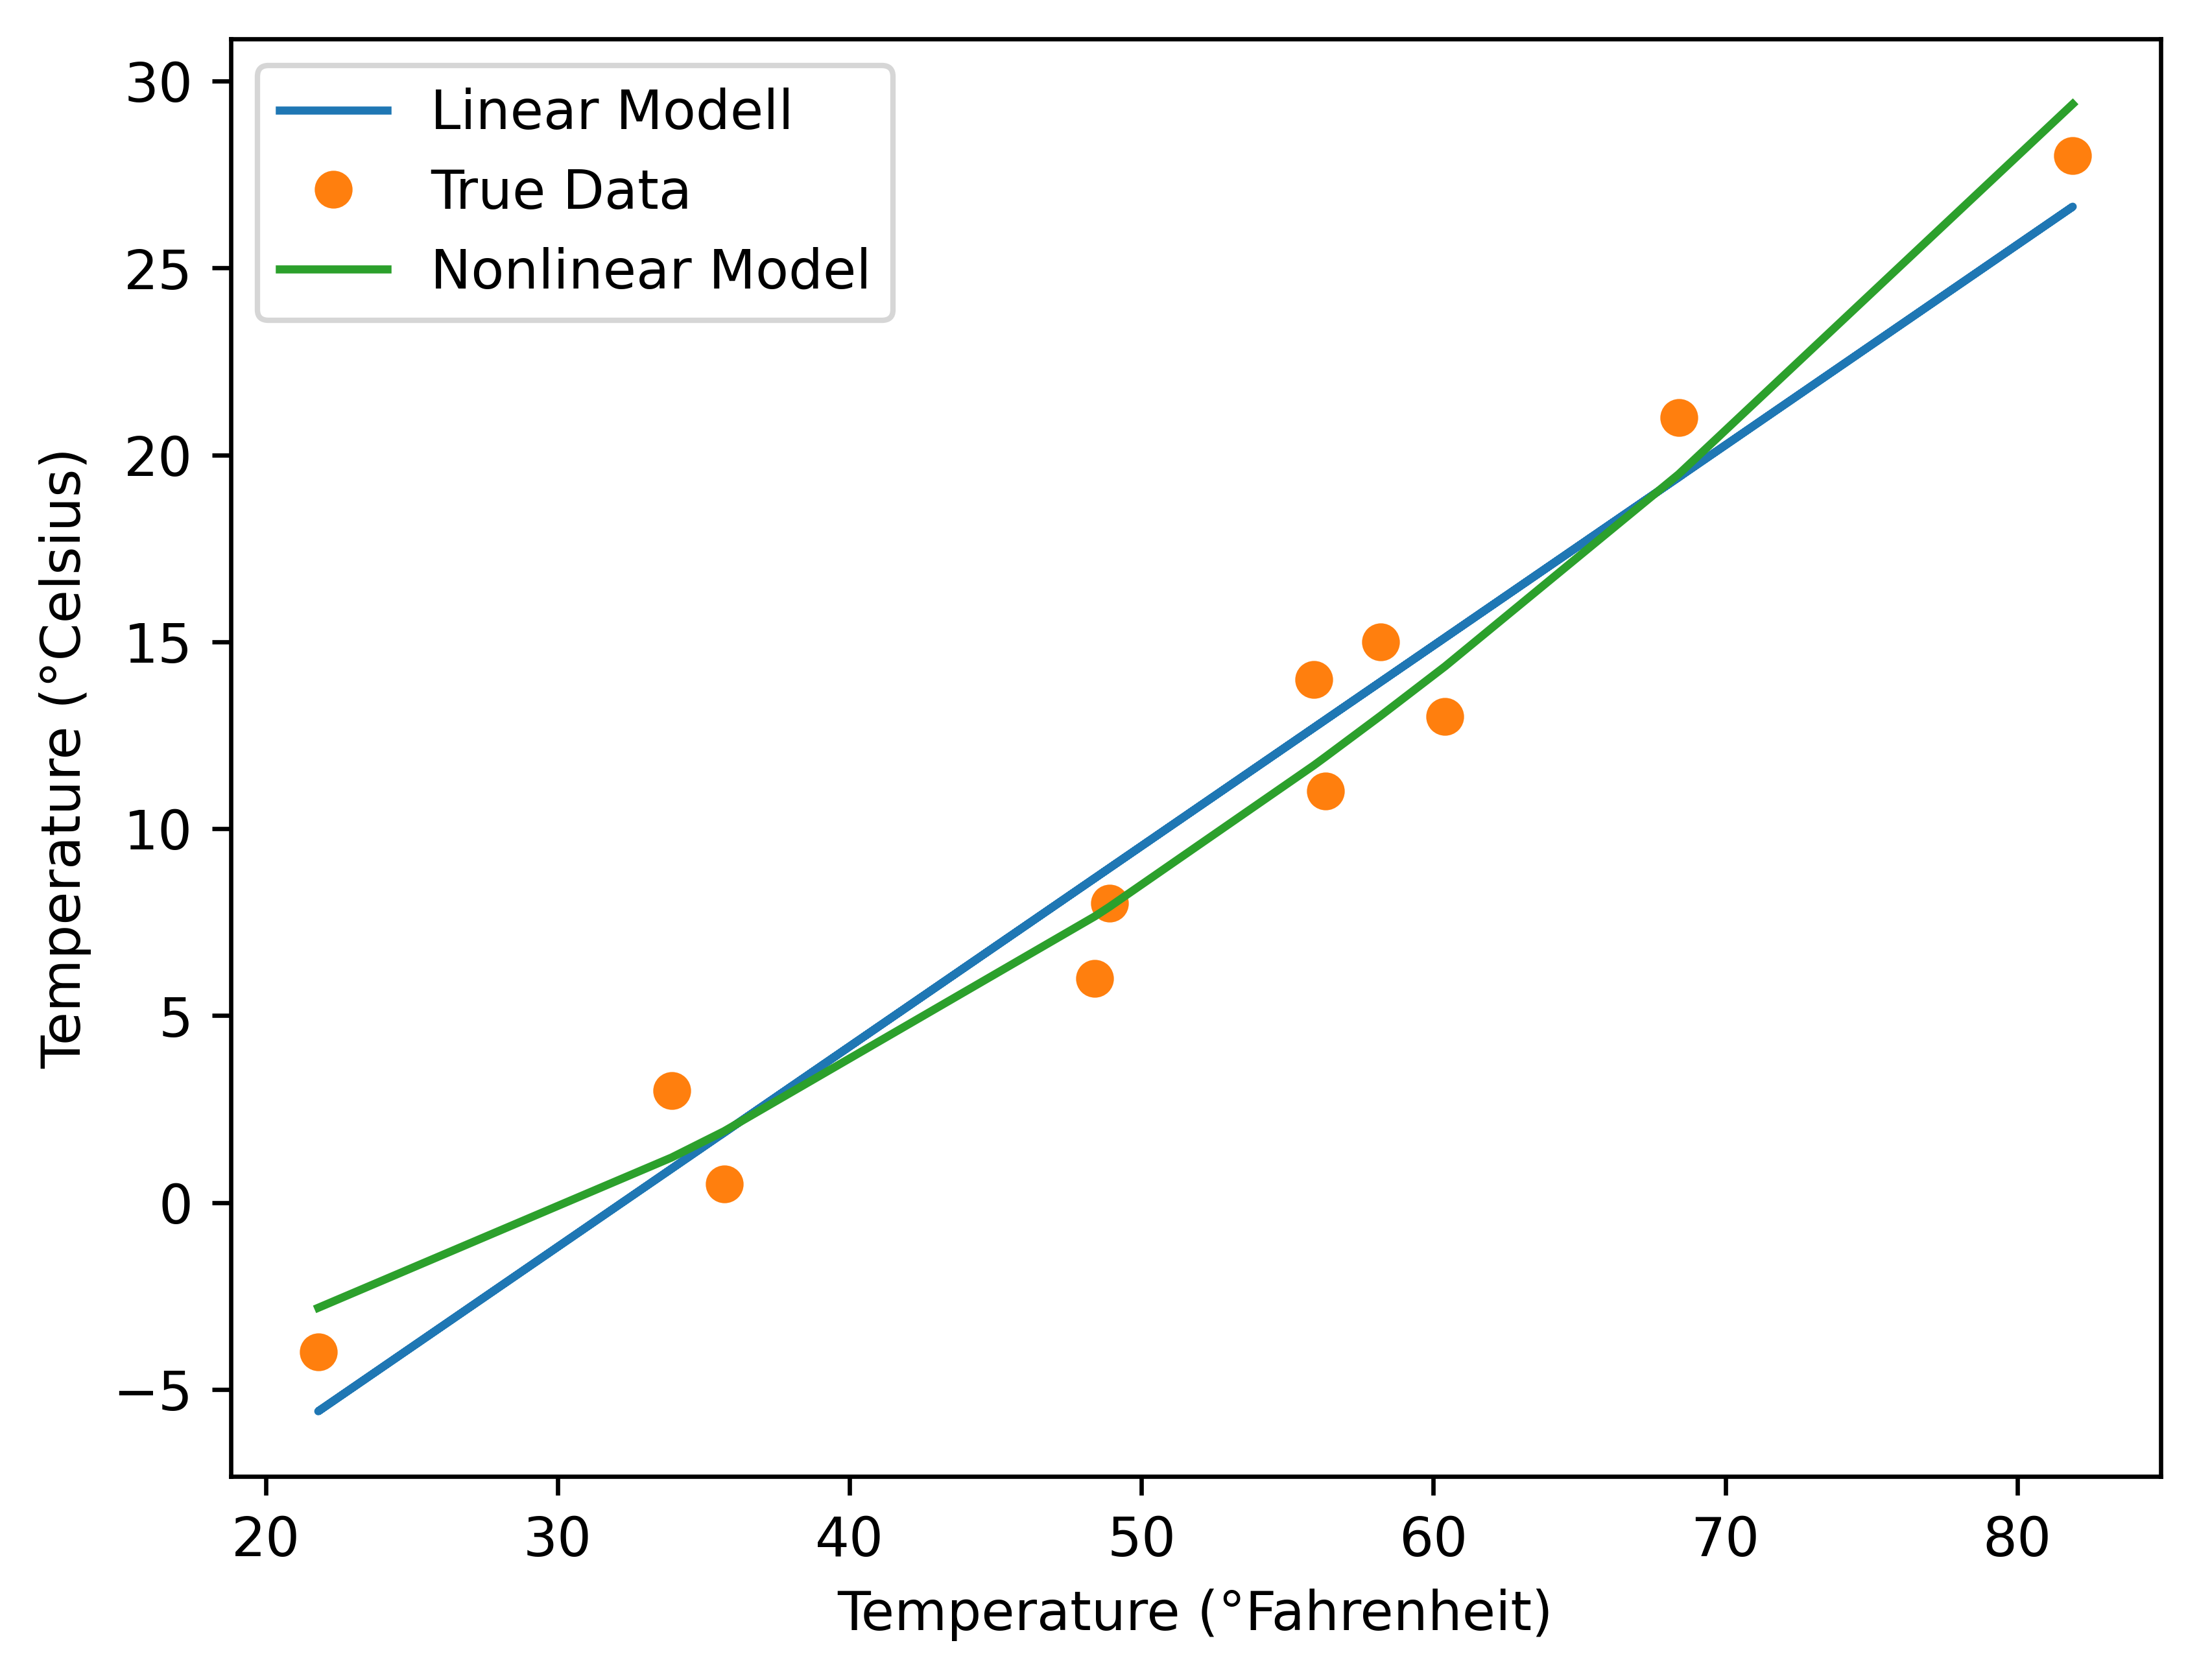

In [27]:
%matplotlib inline
from matplotlib import pyplot as plt

fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p_linear.detach().numpy(), label = "Linear Modell") # <2>
plt.plot(t_u.numpy(), t_c.numpy(), 'o', label = "True Data")

x_nonlinear = t_u.numpy()
y_nonlinear = t_p_nonlinear.detach().numpy()
sort_indices = np.argsort(x_nonlinear)
x_nonlinear_sorted = x_nonlinear[sort_indices]
y_nonlinear_sorted = y_nonlinear[sort_indices]
plt.plot(x_nonlinear_sorted, y_nonlinear_sorted, label = "Nonlinear Model")

plt.legend()